## Generate predictions from models

### Import packages 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
tfkl = tf.keras.layers
import pandas as pd
from scipy.stats import linregress

### Import functions

In [2]:
import evaluation_functions
import importlib
importlib.reload(evaluation_functions)

<module 'evaluation_functions' from '/Users/paigepark/Desktop/deep-mort/code/evaluation_functions.py'>

### Import data

In [3]:
state_training = np.loadtxt('../data/state_training.txt')
state_test = np.loadtxt('../data/state_test.txt')

In [4]:
country_training = np.loadtxt('../data/country_training.txt')
country_test = np.loadtxt('../data/country_test.txt')

In [5]:
combined_training = np.loadtxt('../data/combined_training.txt')
combined_test = np.loadtxt('../data/combined_test.txt')

In [6]:
country_training_new = np.loadtxt('../data/country_training_new.txt')
country_test_new = np.loadtxt('../data/country_test_new.txt')

In [7]:
geos_key = np.load('../data/geos_key_new.npy')
geo_dict = {int(code): geo for geo, code in geos_key}

In [8]:
print(geos_key)
geos_key_old = np.load('../data/geos_key.npy')

[['AK' '0']
 ['AL' '1']
 ['AZ' '2']
 ['AR' '3']
 ['CA' '4']
 ['CO' '5']
 ['CT' '6']
 ['DE' '7']
 ['FL' '8']
 ['GA' '9']
 ['HI' '10']
 ['ID' '11']
 ['IL' '12']
 ['IN' '13']
 ['IA' '14']
 ['KS' '15']
 ['KY' '16']
 ['LA' '17']
 ['ME' '18']
 ['MD' '19']
 ['MA' '20']
 ['MI' '21']
 ['MN' '22']
 ['MS' '23']
 ['MO' '24']
 ['MT' '25']
 ['NE' '26']
 ['NV' '27']
 ['NH' '28']
 ['NJ' '29']
 ['NM' '30']
 ['NY' '31']
 ['NC' '32']
 ['ND' '33']
 ['OH' '34']
 ['OK' '35']
 ['OR' '36']
 ['PA' '37']
 ['RI' '38']
 ['SC' '39']
 ['SD' '40']
 ['TN' '41']
 ['TX' '42']
 ['UT' '43']
 ['VT' '44']
 ['VA' '45']
 ['WA' '46']
 ['WV' '47']
 ['WI' '48']
 ['WY' '49']
 ['AUS' '50']
 ['AUT' '51']
 ['BEL' '52']
 ['BGR' '53']
 ['BLR' '54']
 ['CAN' '55']
 ['CHE' '56']
 ['CZE' '57']
 ['DEUTE' '58']
 ['DEUTW' '59']
 ['DNK' '60']
 ['ESP' '61']
 ['EST' '62']
 ['FIN' '63']
 ['FRATNP' '64']
 ['GBR_NIR' '65']
 ['GBR_SCO' '66']
 ['GBRTENW' '67']
 ['GRC' '68']
 ['HUN' '69']
 ['IRL' '70']
 ['ISL' '71']
 ['ISR' '72']
 ['ITA' '73']
 ['JP

In [9]:
# convert actual test data to log scale
country_test[:,4][country_test[:,4] == 0] = 9e-06
country_test[:,4] = np.log(country_test[:,4])

In [10]:
# convert actual test data to log scale
country_test_new[:,4][country_test_new[:,4] == 0] = 9e-06
country_test_new[:,4] = np.log(country_test_new[:,4])

In [11]:
# convert actual test data to log scale
combined_test[:,4][combined_test[:,4] == 0] = 9e-06
combined_test[:,4] = np.log(combined_test[:,4])

### Import predictions

In [14]:
# DL predictions - trained on all countries
dl_test_pred = []
for i in range(1,6):
    dl_test_pred.append(np.loadtxt(f"../data/dl_country_forecast_{i}.txt"))

# LC predictions
lc_test_pred = []
for i in range(1,6):
    lc_test_pred_temp = np.loadtxt(f"../data/lc_forecast{i}.csv", delimiter=",")
    lc_test_pred_temp = lc_test_pred_temp[np.lexsort((lc_test_pred_temp[:, 1], lc_test_pred_temp[:, 3], lc_test_pred_temp[:, 2], lc_test_pred_temp[:, 0]))]
    lc_test_pred_temp[:,4][lc_test_pred_temp[:,4] == 0] = 9e-06
    lc_test_pred_temp[:,4] = np.log(lc_test_pred_temp[:,4])
    lc_test_pred.append(lc_test_pred_temp)

# hyndman-ullah predictions
hu_test_pred = []
for i in range(1,6):
    hu_test_pred_temp = np.loadtxt(f"../data/hu_forecast{i}.csv", delimiter=",")
    hu_test_pred_temp = hu_test_pred_temp[np.lexsort((hu_test_pred_temp[:, 1], hu_test_pred_temp[:, 3], hu_test_pred_temp[:, 2], hu_test_pred_temp[:, 0]))]
    hu_test_pred_temp[:,4][hu_test_pred_temp[:,4] == 0] = 9e-06
    hu_test_pred_temp[:,4] = np.log(hu_test_pred_temp[:,4])
    hu_test_pred.append(hu_test_pred_temp)

# coherent predictions
c_test_pred = []
for i in range(1,6):
    c_test_pred_temp = np.loadtxt(f"../data/coherent_forecast_test_{i}.csv", delimiter=",")
    c_test_pred_temp = c_test_pred_temp[np.lexsort((c_test_pred_temp[:, 1], c_test_pred_temp[:, 3], c_test_pred_temp[:, 2], c_test_pred_temp[:, 0]))]
    c_test_pred_temp[:,4][c_test_pred_temp[:,4] == 0] = 9e-06
    c_test_pred_temp[:,4] = np.log(c_test_pred_temp[:,4])
    c_test_pred.append(c_test_pred_temp)

# DL predictions - trained on all countries and states
combined_test_pred = []
for i in range(1,6):
    combined_test_pred.append(np.loadtxt(f"../data/combined_test_predictions_{i}.txt"))

In [15]:
# loading in single country / single gender mses rather than predictions (took too much memory to save predictions)
single_country_by_country_gender = []
for i in range(2):
    values = []
    with open(f'../data/single_country_mses_gender_{i}.txt', 'r') as file:
        for line in file:
            _, value = line.strip().split(':', 1)
            values.append(float(value.strip()))

    single_country_by_country_gender.append(np.array(values))

single_country_by_country_gender_ave = (single_country_by_country_gender[0] + single_country_by_country_gender[1]) / 2

In [24]:
single_country_by_country_gender_ave

array([0.02743161, 0.07206704, 0.05090737, 0.05564665, 0.10086681,
       0.02031192, 0.09467966, 0.07883143, 0.06280569, 0.01492292,
       0.15880441, 0.05020237, 0.62424764, 0.14689187, 0.01529705,
       0.3621728 , 0.15032444, 0.0124136 , 0.14101953, 0.07389096,
       0.12843457, 2.17470431, 0.07080112, 0.01727344, 0.01383441,
       0.19105205, 1.64353848, 0.26962653, 0.04925875, 0.16879739,
       0.11116897, 0.02469725, 0.07698187, 0.09130147, 0.09530469,
       0.73507249, 0.07490191, 0.03390536, 0.05697398, 0.00941579])

### Prep data for MSE by age, year, sex plots

In [16]:
actual_data_divided = []
actual_combined_divided = []
actual_data_divided_new = []
dl_test_divided = [[] for _ in range(5)]
combined_test_divided = [[] for _ in range(5)]
lc_test_divided = [[] for _ in range(5)]
hu_test_divided = [[] for _ in range(5)]
c_test_divided = [[] for _ in range(5)]

for j in range(5):
    for i in range(90):
        actual_combined_divided.append(combined_test[combined_test[:,0] == i])
        combined_test_divided[j].append(combined_test_pred[j][combined_test_pred[j][:, 0] == i])

for j in range(5):
    for i in range(50,90):
        actual_data_divided.append(country_test[country_test[:, 0] == i])
        actual_data_divided_new.append(country_test_new[country_test_new[:, 0] == i])
        dl_test_divided[j].append(dl_test_pred[j][dl_test_pred[j][:, 0] == i])
        lc_test_divided[j].append(lc_test_pred[j][lc_test_pred[j][:, 0] == i])
        hu_test_divided[j].append(hu_test_pred[j][hu_test_pred[j][:, 0] == i])
        c_test_divided[j].append(c_test_pred[j][c_test_pred[j][:, 0] == i])


# Figures in Paper

### Overall performance (Figure 1)

In [17]:
lc_all = []
hu_all = []
coh_all = []
dl_all = []

for j in range(5):
    lc_mse_results_by_country = []
    hu_mse_results_by_country = []
    coh_mse_results_by_country = []
    dl_mse_results_by_country = []
    for i in range(0,40):
        lc_mse_overall, lc_rmse_overall, lc_rrmse_overall = evaluation_functions.calculate_error(lc_test_divided[j][i], actual_data_divided_new[i])
        hu_mse_overall, hu_rmse_overall, hu_rrmse_overall = evaluation_functions.calculate_error(hu_test_divided[j][i], actual_data_divided_new[i])
        coh_mse_overall, coh_rmse_overall, coh_rrmse_overall = evaluation_functions.calculate_error(c_test_divided[j][i], actual_data_divided_new[i])
        dl_mse_overall, dl_rmse_overall, dl_rrmse_overall = evaluation_functions.calculate_error(dl_test_divided[j][i], actual_data_divided_new[i])
         
        lc_mse_results_by_country.append(lc_mse_overall)
        hu_mse_results_by_country.append(hu_mse_overall)

        coh_mse_results_by_country.append(coh_mse_overall)
        dl_mse_results_by_country.append(dl_mse_overall)

    lc_all.append(np.array(lc_mse_results_by_country))
    hu_all.append(np.array(hu_mse_results_by_country))
    coh_all.append(np.array(coh_mse_results_by_country))
    dl_all.append(np.array(dl_mse_results_by_country))

In [18]:
# average mses by country
lc_ave_by_country = sum(lc_all) / len(lc_all)
hu_ave_by_country = sum(hu_all) / len(hu_all)
coh_ave_by_country = sum(coh_all) / len(coh_all)
dl_ave_by_country = sum(dl_all) / len(dl_all)

In [19]:
lc_overall = []
hu_overall = []
coh_overall = []
dl_overall = []

for i in range(5):    
    lc_mse_overall, lc_rmse_overall, lc_rrmse_overall = evaluation_functions.calculate_error(lc_test_pred[i], country_test_new)
    hu_mse_overall, hu_rmse_overall, hu_rrmse_overall = evaluation_functions.calculate_error(hu_test_pred[i], country_test_new)
    coh_mse_overall, coh_rmse_overall, coh_rrmse_overall = evaluation_functions.calculate_error(c_test_pred[i], country_test_new)
    dl_mse_overall, dl_rmse_overall, dl_rrmse_overall = evaluation_functions.calculate_error(dl_test_pred[i], country_test_new)

    lc_overall.append(lc_mse_overall)
    hu_overall.append(hu_mse_overall)
    coh_overall.append(coh_mse_overall)
    dl_overall.append(dl_mse_overall)

lc_overall_ave = sum(lc_overall) / len(lc_overall)
hu_overall_ave = sum(hu_overall) / len(hu_overall)
coh_overall_ave = sum(coh_overall) / len(coh_overall)
dl_overall_ave = sum(dl_overall) / len(dl_overall)

print(lc_overall_ave)
print(hu_overall_ave)
print(coh_overall_ave)
print(dl_overall_ave)

0.23117569523055148
0.2082319334080825
0.1806944185257018
0.16837737759463114


In [20]:
single_ctry_gender_overall_ave = np.mean(single_country_by_country_gender_ave)

In [21]:
print(single_ctry_gender_overall_ave)

0.2087695150519721


Plot with no table

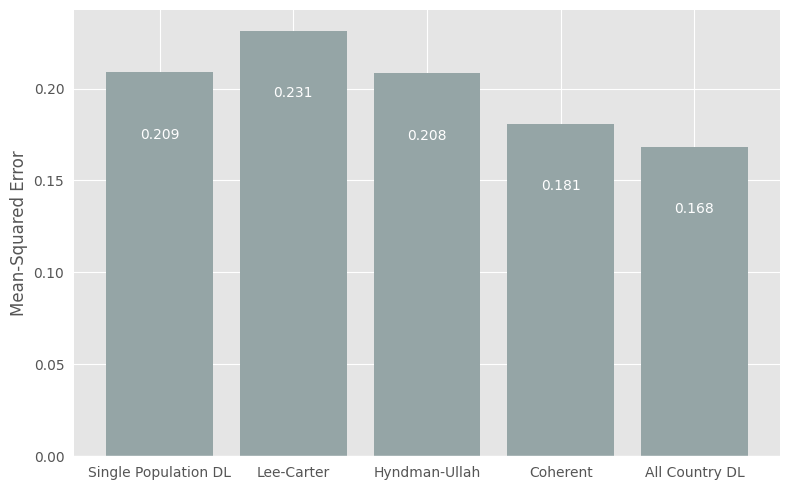

In [22]:
overalls = np.array([single_ctry_gender_overall_ave, lc_overall_ave, hu_overall_ave, coh_overall_ave, dl_overall_ave]) 
labels = ['Single Population DL', 'Lee-Carter', 'Hyndman-Ullah', 'Coherent', 'All Country DL']

# Set style
plt.style.use('ggplot')

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(labels, overalls, color='#95A5A6')  # Soft blue-gray

# Remove spines and unnecessary ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, bottom=False)

# Add value labels inside bars
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        yval - 0.03,  # Position inside the bar
        f'{yval:.3f}',
        ha='center',
        va='top',
        fontsize=10,
        color='white' if yval > 0.15 else 'black'  # Adjust for contrast if needed
    )

# # --- Add vertical arrows between relevant models ---
# # Get bar heights
# heights = overalls

# # --- DL vs Lee-Miller (1-country models), arrow above Single Country DL ---
# scdl_idx = 2  # Single Country DL bar
# lm_idx = 1    # Lee-Miller bar
# x = bars[scdl_idx].get_x() + bars[scdl_idx].get_width()/2  # move arrow to this bar

# y_top = heights[lm_idx]
# y_bottom = heights[scdl_idx]
# delta_1 = y_top - y_bottom

# ax.annotate(
#     '',
#     xy=(x, y_top),
#     xytext=(x, y_bottom),
#     arrowprops=dict(arrowstyle='<->', color='black', lw=1),
# )
# ax.text(x, y_top + 0.015, 'Single Population Improvement', ha='center', va='bottom', fontsize=9)
# ax.text(x + 0.1, (y_top + y_bottom)/2, f'{delta_1:.2f}', ha='left', va='center', fontsize=9, color='black')

# # --- DL vs Coherent (multi-country models), arrow above All Country DL ---
# dl_idx = 4
# coh_idx = 3
# x = bars[dl_idx].get_x() + bars[dl_idx].get_width()/2  # move arrow to DL bar

# y_top = heights[coh_idx]
# y_bottom = heights[dl_idx]
# delta_2 = y_top - y_bottom

# ax.annotate(
#     '',
#     xy=(x, y_top),
#     xytext=(x, y_bottom),
#     arrowprops=dict(arrowstyle='<->', color='black', lw=1),
# )
# ax.text(x, y_top + 0.015, 'Multi-Country Improvement', ha='center', va='bottom', fontsize=9)
# ax.text(x + 0.1, (y_top + y_bottom)/2, f'{delta_2:.2f}', ha='left', va='center', fontsize=9, color='black')



# Minimalist layout
ax.set_ylabel('Mean-Squared Error')
ax.set_xlabel('')
plt.tight_layout()
#plt.savefig("../results/overall_barplot.pdf", format="pdf")
plt.show()


Plot with table

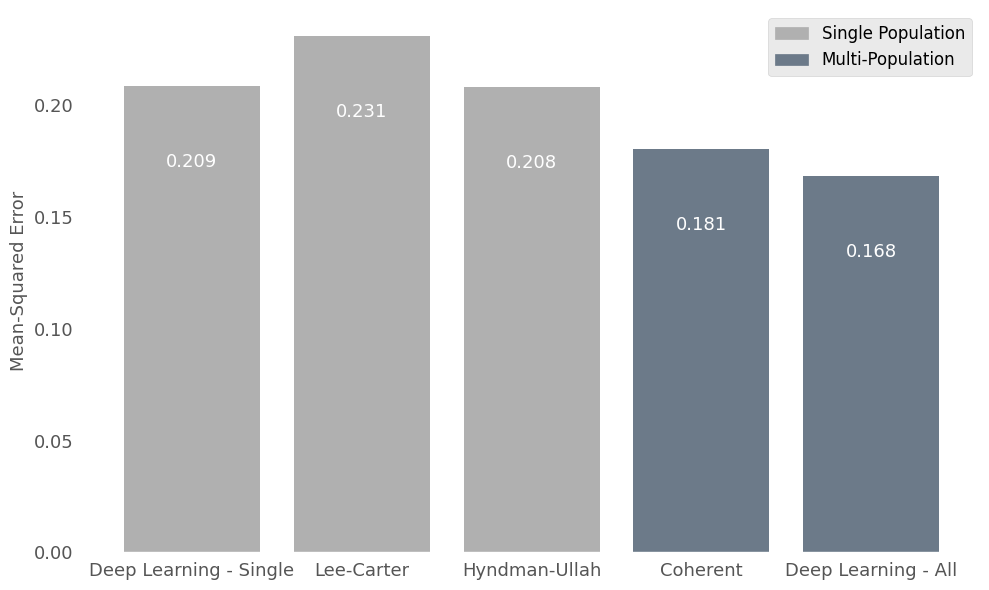

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Data (no Lee-Carter)
overalls = np.array([single_ctry_gender_overall_ave, lc_overall_ave, hu_overall_ave, coh_overall_ave, dl_overall_ave])
labels = ['Deep Learning - Single', 'Lee-Carter', 'Hyndman-Ullah', 'Coherent', 'Deep Learning - All']

# Define bar colors: light gray for single-country, darker gray-blue for multi-country
bar_colors = ['#B0B0B0', '#B0B0B0', '#B0B0B0', '#6C7A89', '#6C7A89']  # Soft neutral tones

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('white')

bars = ax.bar(labels, overalls, color=bar_colors)

# Clean axes
ax.set_facecolor('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, bottom=False, labelsize=13)

# Bar labels
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        yval - 0.03,
        f'{yval:.3f}',
        ha='center',
        va='top',
        fontsize=13,
        color='white' if yval > 0.15 else 'black'
    )

# Legend with neutral tones
legend_handles = [
    mpatches.Patch(color='#B0B0B0', label='Single Population'),
    mpatches.Patch(color='#6C7A89', label='Multi-Population')
]
ax.legend(handles=legend_handles, fontsize=12, loc='upper right')

# Final labels
ax.set_ylabel('Mean-Squared Error', fontsize=13)
ax.set_xlabel('')

plt.tight_layout()
#plt.savefig("../results/overall_barplot_with_legend.pdf", format="pdf")
plt.show()



### Results by country (Table 1)

In [81]:
overalls = np.array([lc_overall_ave, hu_overall_ave, single_ctry_gender_overall_ave, coh_overall_ave, dl_overall_ave])
labels = ['Lee-Carter', 'Hyndman-Ullah', 'Single Population DL', 'Coherent', 'All Country DL']

In [82]:
mse_results_by_country = np.column_stack((lc_ave_by_country, hu_ave_by_country, single_country_by_country_gender_ave, coh_ave_by_country, dl_ave_by_country))

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 40 and the array at index 2 has size 38

In [78]:
len(lc_ave_by_country)

38

In [84]:
new_mses = np.row_stack([mse_results_by_country, overalls])

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4 and the array at index 1 has size 5

In [57]:
# add a row to geos_key for overall mses
geos_key
new = np.array([["Overall", 90]])
geos_key_new = np.vstack([geos_key, new])

In [58]:
# change geo abbreviations to full name for table
full_names_mapping = {
    # US states
    'AK': 'Alaska', 'AL': 'Alabama', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'IA': 'Iowa', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky',
    'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire',
    'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina',
    'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon',
    'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',

    # Countries
    'AUS': 'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 'BGR': 'Bulgaria', 'BLR': 'Belarus',
    'CAN': 'Canada', 'CHE': 'Switzerland', 'CZE': 'Czech Republic', 'DNK': 'Denmark', 'DEUTE': 'East Germany',
    'DEUTW': 'West Germany',
    'ESP': 'Spain', 'EST': 'Estonia', 'FIN': 'Finland', 'FRATNP': 'France',
    'GBRTENW': 'England and Wales', 'GBR_NIR': 'Northern Ireland',
    'GBR_SCO': 'Scotland', 'GRC': 'Greece', 'HUN': 'Hungary', 'IRL': 'Ireland',
    'ISL': 'Iceland', 'ISR': 'Israel', 'ITA': 'Italy', 'JPN': 'Japan', 'LTU': 'Lithuania',
    'LUX': 'Luxembourg', 'LVA': 'Latvia', 'NLD': 'Netherlands', 'NOR': 'Norway',
    'NZL_NM': 'New Zealand', 'POL': 'Poland', 'PRT': 'Portugal', 'RUS': 'Russia',
    'SVK': 'Slovakia', 'SVN': 'Slovenia', 'SWE': 'Sweden', 'TWN': 'Taiwan',
    'UKR': 'Ukraine', 'USA': 'United States', 'NZL_NM': 'New Zealand',
    'Overall': 'Overall'
}

# Convert existing array
geos_key_full_names = np.array([
    [full_names_mapping.get(code, code), idx] for code, idx in geos_key_new
])

In [67]:
len(np.unique(country_training_new[:,0]))+1

41

In [69]:
percent_improvement_all_countries = []
for i in range(0,len(np.unique(country_training_new[:,0]))-1):
    val = (1 - new_mses[i][4] / new_mses[i][3]) * 100
    percent_improvement_all_countries.append(val)


In [70]:
mses_with_percent_imp = np.column_stack((new_mses, percent_improvement_all_countries))

In [71]:
# create a DataFrame
df_mse = pd.DataFrame(
    mses_with_percent_imp,
    columns=['LC', 'HU', 'DL Single', 'Coherent', 'DL All', "\% Impr. DL vs Coherent"],
    index=[geos_key_full_names[i+50, 0] for i in range(len(new_mses))]
)
# round
df_mse = df_mse.round(3)


# sort by the last column in descending order
df_data = df_mse.iloc[:-1]
df_overall = df_mse.iloc[-1:]
df_data_sorted = df_data.sort_values(by="\% Impr. DL vs Coherent", ascending=False)

# concatenate the sorted data with the overall row at the end
df_final = pd.concat([df_data_sorted, df_overall])

# convert the DataFrame to a LaTeX formatted table
latex_table = df_final.to_latex(index=True, float_format="%.3f")

# display the LaTeX code
print(latex_table)


\begin{tabular}{lrrrrrr}
\toprule
 & LC & HU & DL Single & Coherent & DL All & \% Impr. DL vs Coherent \\
\midrule
Taiwan & 0.013 & 0.046 & 0.011 & inf & 0.034 & 100.000 \\
Luxembourg & 0.054 & 0.507 & 0.039 & inf & 0.316 & 100.000 \\
Greece & 0.160 & 0.167 & 0.144 & inf & 0.126 & 100.000 \\
Slovenia & 0.037 & 0.267 & 0.062 & inf & 0.144 & 100.000 \\
Israel & 0.026 & 0.074 & 0.016 & inf & 0.058 & 100.000 \\
Finland & 0.024 & 0.102 & 0.014 & 0.094 & 0.039 & 58.735 \\
NZL_NP & 0.142 & 0.164 & 0.065 & 0.138 & 0.092 & 33.582 \\
Scotland & 0.080 & 0.189 & 0.222 & 0.155 & 0.112 & 27.430 \\
Ireland & 0.075 & 0.189 & 0.137 & 0.132 & 0.097 & 26.696 \\
Lithuania & 0.381 & 0.289 & 0.501 & 0.254 & 0.204 & 19.535 \\
Switzerland & 0.137 & 0.116 & 0.128 & 0.121 & 0.098 & 19.000 \\
Netherlands & 0.117 & 0.153 & 0.149 & 0.150 & 0.121 & 18.895 \\
Belarus & 0.142 & 0.142 & 0.082 & 0.069 & 0.060 & 12.756 \\
Portugal & 0.185 & 0.190 & 0.093 & 0.177 & 0.155 & 12.608 \\
Belgium & 0.063 & 0.059 & 0.113 & 0.05

### Top performers (Figure 3)

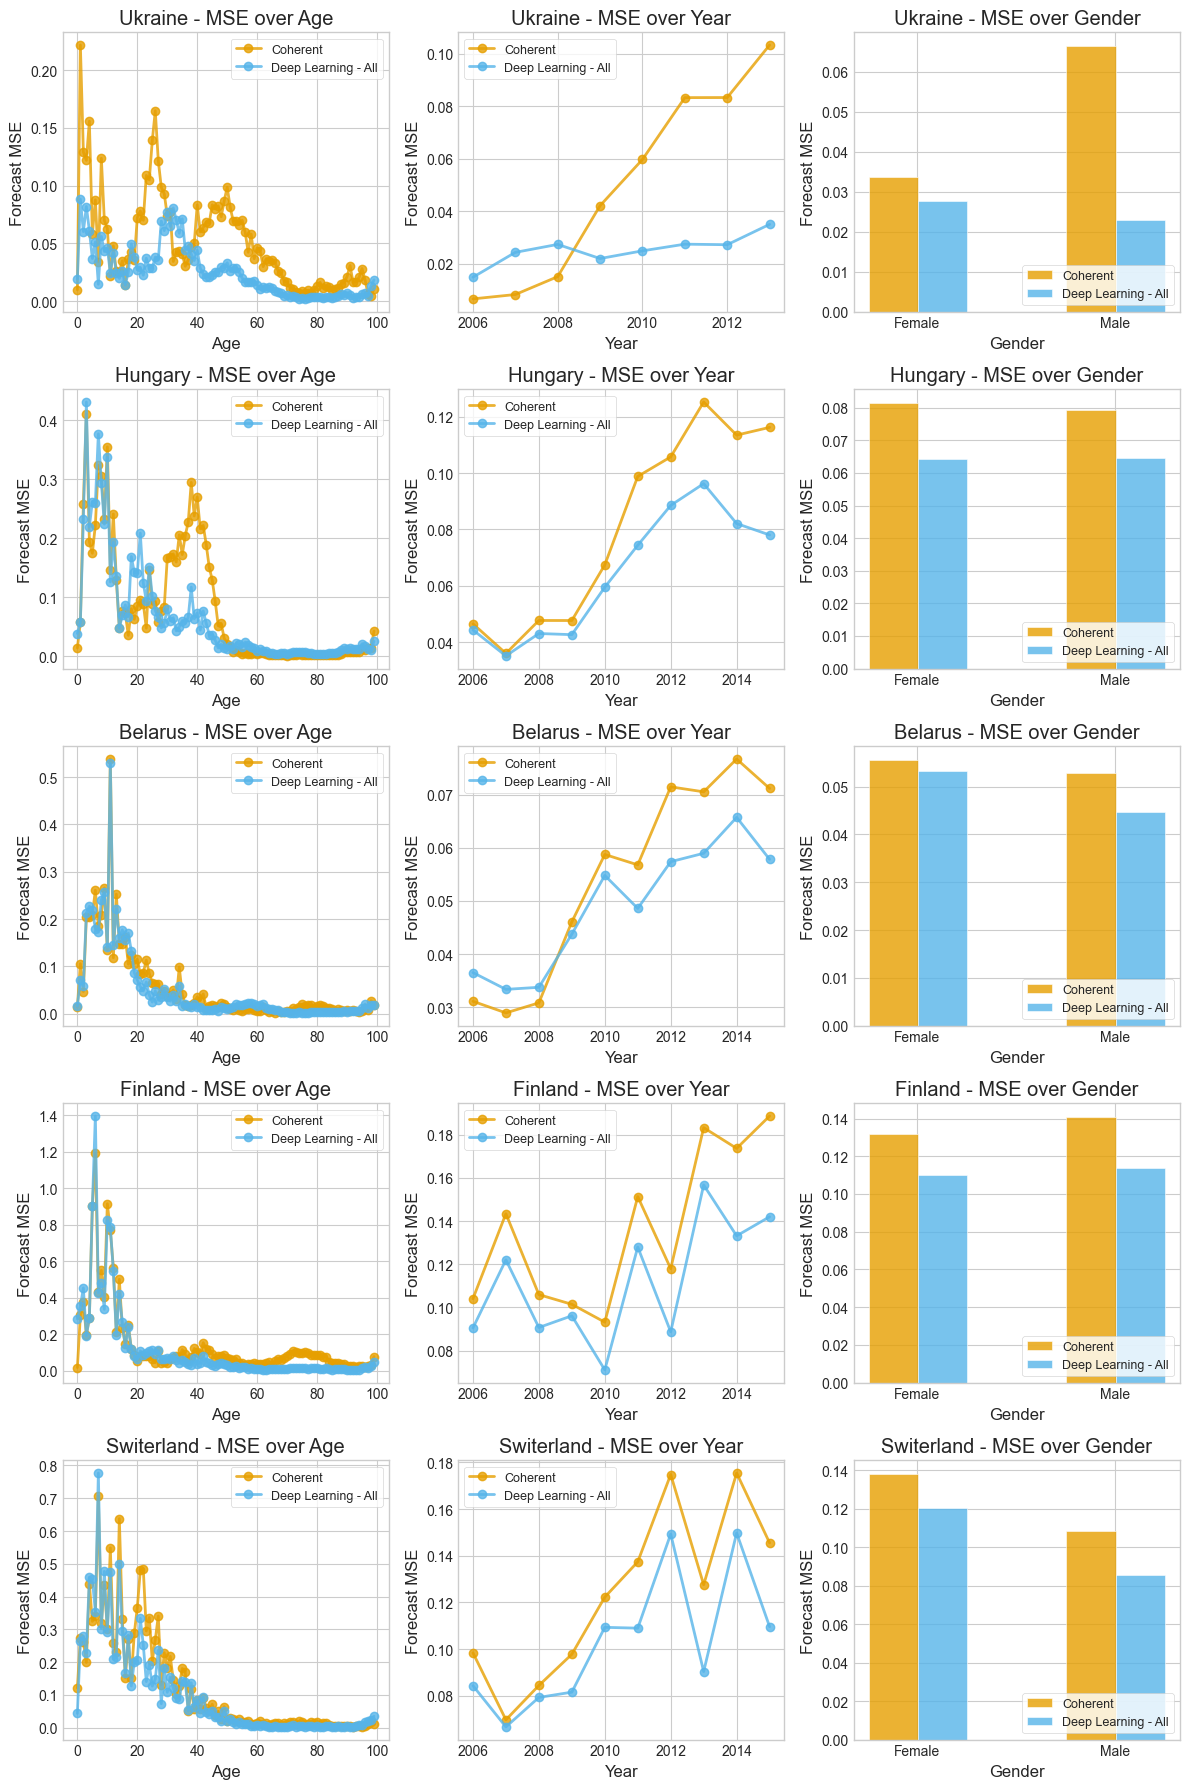

In [58]:
# Simple top performer / US figures 
sns.set_style("whitegrid")
palette = ["#E69F00", "#56B4E9", "#009E73"]  # orange, sky blue, green

def compute_avg_mses(country_index, feature_index):
    model_data = {
        "Coherent": c_test_divided,
        "Deep Learning - All": dl_test_divided
    }
    avg_mses = {}

    for label, test_data in model_data.items():
        mse_list = []
        for i in range(5):
            mse, _, _ = evaluation_functions.calculate_error_by_category(
                test_data[i][country_index],
                actual_data_divided[country_index],
                feature_index=feature_index
            )
            mse_list.append(mse)

        combined = {}
        for d in mse_list:
            for k, v in d.items():
                if k not in combined:
                    combined[k] = [v, 1]
                else:
                    combined[k][0] += v
                    combined[k][1] += 1
        avg_mses[label] = {k: total / count for k, (total, count) in combined.items()}

    return avg_mses

countries = {"Ukraine": 36, "Hungary": 17, "Belarus": 2, "Finland": 11, "Switerland": 6}
features = {"Age": 3, "Year": 2, "Gender": 1}  # Note: "Gender" has feature_index = 1

fig, axes = plt.subplots(5, 3, figsize=(12, 18), sharey=False)
axes = axes.flatten()

for idx, (country_name, country_index) in enumerate(countries.items()):
    for jdx, (feature_name, feature_index) in enumerate(features.items()):
        avg_mses = compute_avg_mses(country_index, feature_index)
        ax = axes[idx * len(features) + jdx]  # Corrected indexing

        for i, (label, data) in enumerate(avg_mses.items()):
            keys, values = zip(*sorted(data.items()))

            if feature_index == 1:  # Gender (categorical)
                x = np.arange(len(keys)) + i * 0.25  # offset bars
                ax.bar(x, values, width=0.25, label=label, alpha=0.8, color=palette[i])
                gender_labels = ['Female' if k == 0 else 'Male' for k in keys]
                ax.set_xticks(np.arange(len(keys)) + 0.12)
                ax.set_xticklabels(gender_labels)
                ax.legend(fontsize=9, loc='lower right', frameon=True)
            else:
                ax.plot(keys, values, label=label, linestyle='-', marker='o',
                        linewidth=2, alpha=0.8, color=palette[i])
                ax.legend(fontsize=9, loc='best', frameon=True)

        ax.set_title(f"{country_name} - MSE over {feature_name}")
        ax.set_xlabel(feature_name)
        ax.set_ylabel("Forecast MSE")
        

plt.tight_layout()
plt.savefig("../results/top_6x3.pdf", format="pdf", bbox_inches="tight")
plt.show()


# US (Figure 4)

In [31]:
# Set country index to 50 - geos_key
country_index = 37

In [32]:
# coherent average mses
c_mse_list = []
c_rmse_list = []
c_rrmse_list = []

for i in range(5):
    c_mse, c_rmse, c_rrmse = evaluation_functions.calculate_error_by_category(c_test_divided[i][country_index], actual_data_divided[country_index], feature_index=3) # 3 is age 
    c_mse_list.append(c_mse)
    c_rmse_list.append(c_rmse)
    c_rrmse_list.append(c_rrmse)

combined = {}

for d in c_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

c_ave_mses_age = {k: total / count for k, (total, count) in combined.items()}

In [33]:
dl_mse_list = []
dl_rmse_list = []
dl_rrmse_list = []

for i in range(5):
    dl_mse, dl_rmse, dl_rrmse = evaluation_functions.calculate_error_by_category(dl_test_divided[i][country_index], actual_data_divided[country_index], feature_index=3) 
    dl_mse_list.append(dl_mse)
    dl_rmse_list.append(dl_rmse)
    dl_rrmse_list.append(dl_rrmse)

combined = {}

for d in dl_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

dl_ave_mses_age = {k: total / count for k, (total, count) in combined.items()}

In [34]:
combined_index = 87
combined_mse_list = []
combined_rmse_list = []
combined_rrmse_list = []

for i in range(5):
    combined_mse, combined_rmse, combined_rrmse = evaluation_functions.calculate_error_by_category(combined_test_divided[i][combined_index], actual_combined_divided[combined_index], feature_index=3) 
    combined_mse_list.append(combined_mse)
    combined_rmse_list.append(combined_rmse)
    combined_rrmse_list.append(combined_rrmse)

combined = {}

for d in combined_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

combined_ave_mses_age = {k: total / count for k, (total, count) in combined.items()}

Getting results by year 

In [35]:
# coherent average mses
c_mse_list = []
c_rmse_list = []
c_rrmse_list = []

for i in range(5):
    c_mse, c_rmse, c_rrmse = evaluation_functions.calculate_error_by_category(c_test_divided[i][country_index], actual_data_divided[country_index], feature_index=2) 
    c_mse_list.append(c_mse)
    c_rmse_list.append(c_rmse)
    c_rrmse_list.append(c_rrmse)

combined = {}

for d in c_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

c_ave_mses_year = {k: total / count for k, (total, count) in combined.items()}

In [36]:
dl_mse_list = []
dl_rmse_list = []
dl_rrmse_list = []

for i in range(5):
    dl_mse, dl_rmse, dl_rrmse = evaluation_functions.calculate_error_by_category(dl_test_divided[i][country_index], actual_data_divided[country_index], feature_index=2) 
    dl_mse_list.append(dl_mse)
    dl_rmse_list.append(dl_rmse)
    dl_rrmse_list.append(dl_rrmse)

combined = {}

for d in dl_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

dl_ave_mses_year = {k: total / count for k, (total, count) in combined.items()}

In [37]:
combined_index = 87
combined_mse_list = []
combined_rmse_list = []
combined_rrmse_list = []

for i in range(5):
    combined_mse, combined_rmse, combined_rrmse = evaluation_functions.calculate_error_by_category(combined_test_divided[i][combined_index], actual_combined_divided[combined_index], feature_index=2) 
    combined_mse_list.append(combined_mse)
    combined_rmse_list.append(combined_rmse)
    combined_rrmse_list.append(combined_rrmse)

combined = {}

for d in combined_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

combined_ave_mses_year = {k: total / count for k, (total, count) in combined.items()}

Getting results by gender

In [38]:
# coherent average mses
c_mse_list = []
c_rmse_list = []
c_rrmse_list = []

for i in range(5):
    c_mse, c_rmse, c_rrmse = evaluation_functions.calculate_error_by_category(c_test_divided[i][country_index], actual_data_divided[country_index], feature_index=1) 
    c_mse_list.append(c_mse)
    c_rmse_list.append(c_rmse)
    c_rrmse_list.append(c_rrmse)

combined = {}

for d in c_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

c_ave_mses_gender = {k: total / count for k, (total, count) in combined.items()}

In [39]:
dl_mse_list = []
dl_rmse_list = []
dl_rrmse_list = []

for i in range(5):
    dl_mse, dl_rmse, dl_rrmse = evaluation_functions.calculate_error_by_category(dl_test_divided[i][country_index], actual_data_divided[country_index], feature_index=1) 
    dl_mse_list.append(dl_mse)
    dl_rmse_list.append(dl_rmse)
    dl_rrmse_list.append(dl_rrmse)

combined = {}

for d in dl_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

dl_ave_mses_gender = {k: total / count for k, (total, count) in combined.items()}

In [40]:
combined_index = 87
combined_mse_list = []
combined_rmse_list = []
combined_rrmse_list = []

for i in range(5):
    combined_mse, combined_rmse, combined_rrmse = evaluation_functions.calculate_error_by_category(combined_test_divided[i][combined_index], actual_combined_divided[combined_index], feature_index=1) 
    combined_mse_list.append(combined_mse)
    combined_rmse_list.append(combined_rmse)
    combined_rrmse_list.append(combined_rrmse)

combined = {}

for d in combined_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

combined_ave_mses_gender = {k: total / count for k, (total, count) in combined.items()}

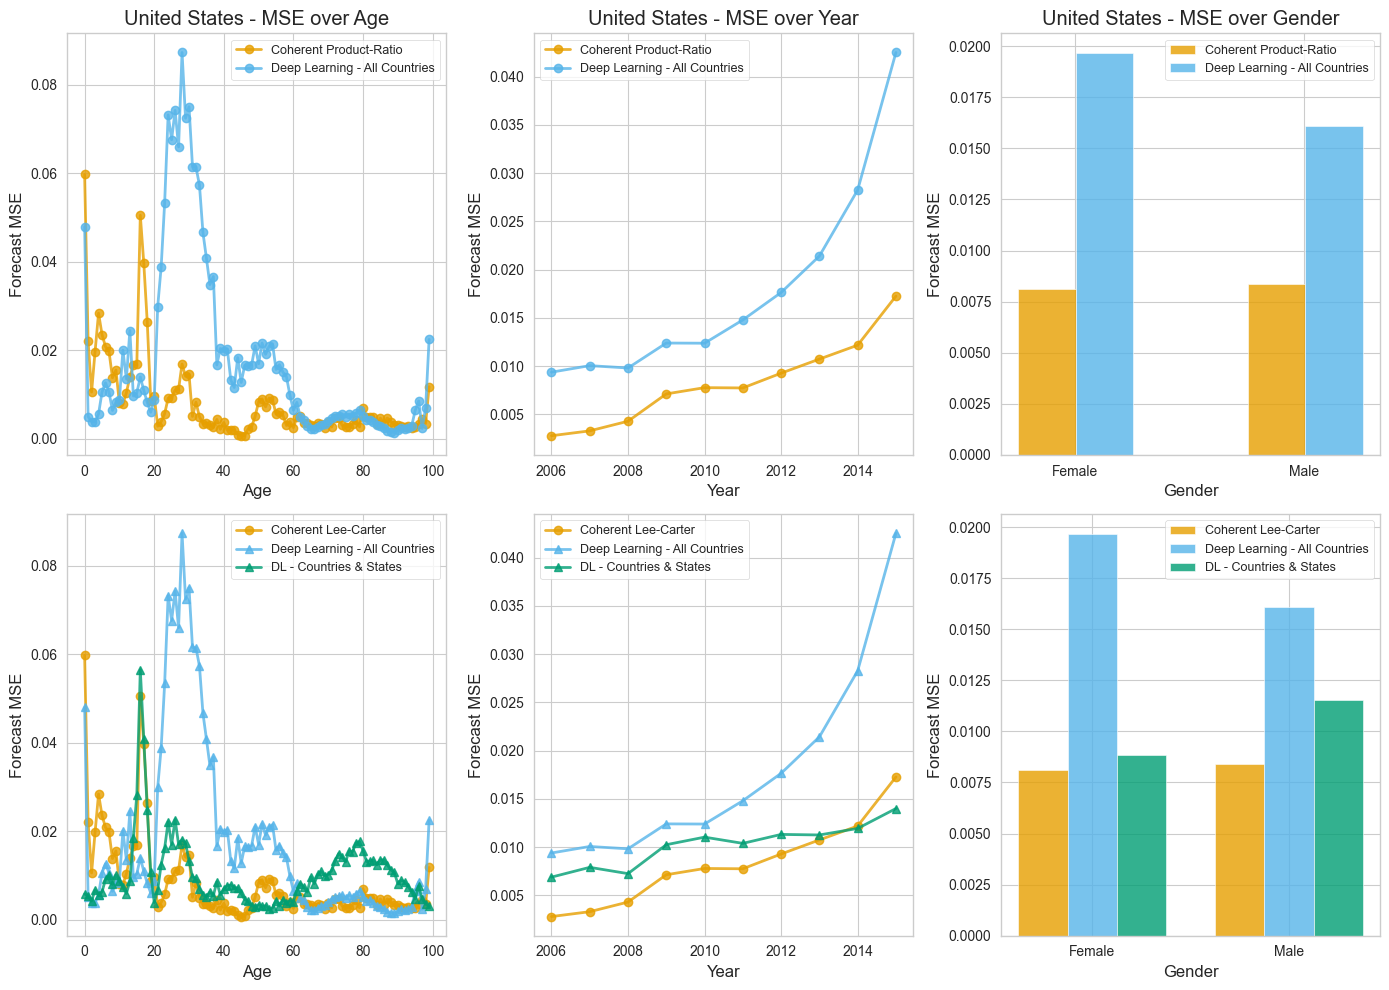

In [41]:
sns.set_style("whitegrid")
palette = ["#E69F00", "#56B4E9", "#009E73"]

# Prepare the sorted data
# For Age
keys1_age, values1_age = zip(*sorted(c_ave_mses_age.items()))
keys2_age, values2_age = zip(*sorted(dl_ave_mses_age.items()))
keys3_age, values3_age = zip(*sorted(combined_ave_mses_age.items()))

# For Year
keys1_year, values1_year = zip(*sorted(c_ave_mses_year.items()))
keys2_year, values2_year = zip(*sorted(dl_ave_mses_year.items()))
keys3_year, values3_year = zip(*sorted(combined_ave_mses_year.items()))

# For Year
keys1_gender, values1_gender = zip(*sorted(c_ave_mses_gender.items()))
keys2_gender, values2_gender = zip(*sorted(dl_ave_mses_gender.items()))
keys3_gender, values3_gender = zip(*sorted(combined_ave_mses_gender.items()))

fig, axes = plt.subplots(2, 3, figsize=(14, 10))  # 2 rows, 3 columns
axes = axes.flatten()

# --- Top row: Individual country results (e.g., United States) ---
countries = {"United States": 37}
features = {"Age": 3, "Year": 2, "Gender": 1}

for idx, (country_name, country_index) in enumerate(countries.items()):
    for jdx, (feature_name, feature_index) in enumerate(features.items()):
        avg_mses = compute_avg_mses(country_index, feature_index)
        ax = axes[idx * len(features) + jdx]  # Corrected indexing

        for i, (label, data) in enumerate(avg_mses.items()):
            keys, values = zip(*sorted(data.items()))

            if feature_index == 1:  # Gender (categorical)
                x = np.arange(len(keys)) + i * 0.25  # offset bars
                ax.bar(x, values, width=0.25, label=label, alpha=0.8, color=palette[i])
                gender_labels = ['Female' if k == 0 else 'Male' for k in keys]
                ax.set_xticks(np.arange(len(keys)) + 0.12)
                ax.set_xticklabels(gender_labels)
                ax.legend(fontsize=9, loc='upper right')
            else:
                ax.plot(keys, values, label=label, linestyle='-', marker='o',
                        linewidth=2, alpha=0.8, color=palette[i])
                ax.legend(fontsize=9, loc='best')

        ax.set_title(f"{country_name} - MSE over {feature_name}")
        ax.set_xlabel(feature_name)
        ax.set_ylabel("Forecast MSE")

# --- Bottom row: Combined model comparisons ---
# Age
axes[3].plot(keys1_age, values1_age, label="Coherent Lee-Carter", color=palette[0], linestyle='-', marker='o', linewidth=2, alpha=0.8)
axes[3].plot(keys2_age, values2_age, label="Deep Learning - All Countries", color=palette[1], linestyle='-', marker='^', linewidth=2, alpha=0.8)
axes[3].plot(keys3_age, values3_age, label="DL - Countries & States", color=palette[2], linestyle='-', marker='^', linewidth=2, alpha=0.8)
axes[3].set_xlabel("Age")
axes[3].set_ylabel("Forecast MSE")
axes[3].legend(fontsize=9)

# Year
axes[4].plot(keys1_year, values1_year, label="Coherent Lee-Carter", color=palette[0], linestyle='-', marker='o', linewidth=2, alpha=0.8)
axes[4].plot(keys2_year, values2_year, label="Deep Learning - All Countries", color=palette[1], linestyle='-', marker='^', linewidth=2, alpha=0.8)
axes[4].plot(keys3_year, values3_year, label="DL - Countries & States", color=palette[2], linestyle='-', marker='^', linewidth=2, alpha=0.8)
axes[4].set_xlabel("Year")
axes[4].set_ylabel("Forecast MSE")
axes[4].legend(fontsize=9)

# Gender
ax = axes[5]
keys = list(keys1_gender)  # should be [0, 1]
x = np.arange(len(keys))

bar_width = 0.25

# Offset each set of bars
ax.bar(x - bar_width, values1_gender, width=bar_width, label="Coherent Lee-Carter", color=palette[0], alpha=0.8)
ax.bar(x, values2_gender, width=bar_width, label="Deep Learning - All Countries", color=palette[1], alpha=0.8)
ax.bar(x + bar_width, values3_gender, width=bar_width, label="DL - Countries & States", color=palette[2], alpha=0.8)

# Labeling
gender_labels = ['Female' if k == 0 else 'Male' for k in keys]
ax.set_xticks(x)
ax.set_xticklabels(gender_labels)

ax.set_xlabel("Gender")
ax.set_ylabel("Forecast MSE")
ax.legend(fontsize=9)

plt.tight_layout()
plt.savefig("../results/combined_us_3x3.pdf", format="pdf", bbox_inches="tight")
plt.show()


# Supplement figures

Log simulation

In [42]:
# Define true mortality rates
young_rate = 0.0004
middle_rate = 0.004
old_rate = 0.2

rates = np.array([young_rate, middle_rate, old_rate])
age_labels = ['Young', 'Middle-aged', 'Old']

# Convert to log scale
log_rates = np.log(rates)

# Simulate model prediction with fixed error in log space
log_error_value = 0.2
log_preds = log_rates + log_error_value

# Convert predictions back to original scale
predicted_rates = np.exp(log_preds)

# Compute log error and absolute error
log_errors = log_preds - log_rates
abs_errors = np.abs(predicted_rates - rates)

# Create DataFrame
df = pd.DataFrame({
    'Age Group': age_labels,
    'True Rate': rates,
    'Predicted Rate': predicted_rates,
    'Log Error': log_errors,
    'Absolute Error': abs_errors
})

# Round for nicer table formatting
df_rounded = df.copy()
df_rounded[['True Rate', 'Predicted Rate', 'Log Error', 'Absolute Error']] = df_rounded[
    ['True Rate', 'Predicted Rate', 'Log Error', 'Absolute Error']
].round(6)

# Output LaTeX code
latex_table = df_rounded.to_latex(index=False, caption="Errors from log-scale mortality prediction.", label="tab:log_error_example")
print(latex_table)


\begin{table}
\caption{Errors from log-scale mortality prediction.}
\label{tab:log_error_example}
\begin{tabular}{lrrrr}
\toprule
Age Group & True Rate & Predicted Rate & Log Error & Absolute Error \\
\midrule
Young & 0.000400 & 0.000489 & 0.200000 & 0.000089 \\
Middle-aged & 0.004000 & 0.004886 & 0.200000 & 0.000886 \\
Old & 0.200000 & 0.244281 & 0.200000 & 0.044281 \\
\bottomrule
\end{tabular}
\end{table}



Population plots

In [43]:
# read in population data from world bank
population_data_full = pd.read_csv('../data/pop-data.csv', delimiter=',', skiprows=4)

In [44]:
valid_codes_full = set(full_names_mapping.values())
valid_codes_abr = set(geo_dict.values())

In [45]:
valid_codes_full.discard('Georgia')
valid_codes_abr.discard('GEO')

In [46]:
population_data_rows = population_data_full[population_data_full['Country Name'].isin(valid_codes_full) | (population_data_full['Country Code'].isin(valid_codes_abr))]

In [47]:
# get pop data for 1987, midpoint of time series
pop_data_1987 = population_data_rows[['Country Code', '1987']]


In [48]:
# manually add data for UK countries and Taiwan as they are not included in WB data
# from Office for National Statistics (https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates)
# E & W 1987 pop
# 50123000
ew = np.array(['GBRTENW', 50123000])


# Scot 1987 pop
# 5099000
scot = np.array(['GBR_SCO', 5099000])

# NIR 1987 pop
# 1582000
nir = np.array(['GBR_NIR', 1582000])

# from Wikepedia, which cites (https://eng.stat.gov.tw/default.aspx) 
# Taiwan 1987 pop
# 19564000
twn = np.array(['TWN', 19564000])

additional_countries = np.row_stack([ew, scot, nir, twn])

In [49]:
additional_countries = pd.DataFrame(additional_countries, columns=['Country Code', '1987'])

In [50]:
pop_data_1987_all = pd.concat([pop_data_1987, additional_countries], ignore_index=True)

In [51]:
pop_data_1987_all = pop_data_1987_all.sort_values(by = 'Country Code', ignore_index=True)

In [52]:
percent_improvement_all_countries_no_overall = percent_improvement_all_countries[:-1]

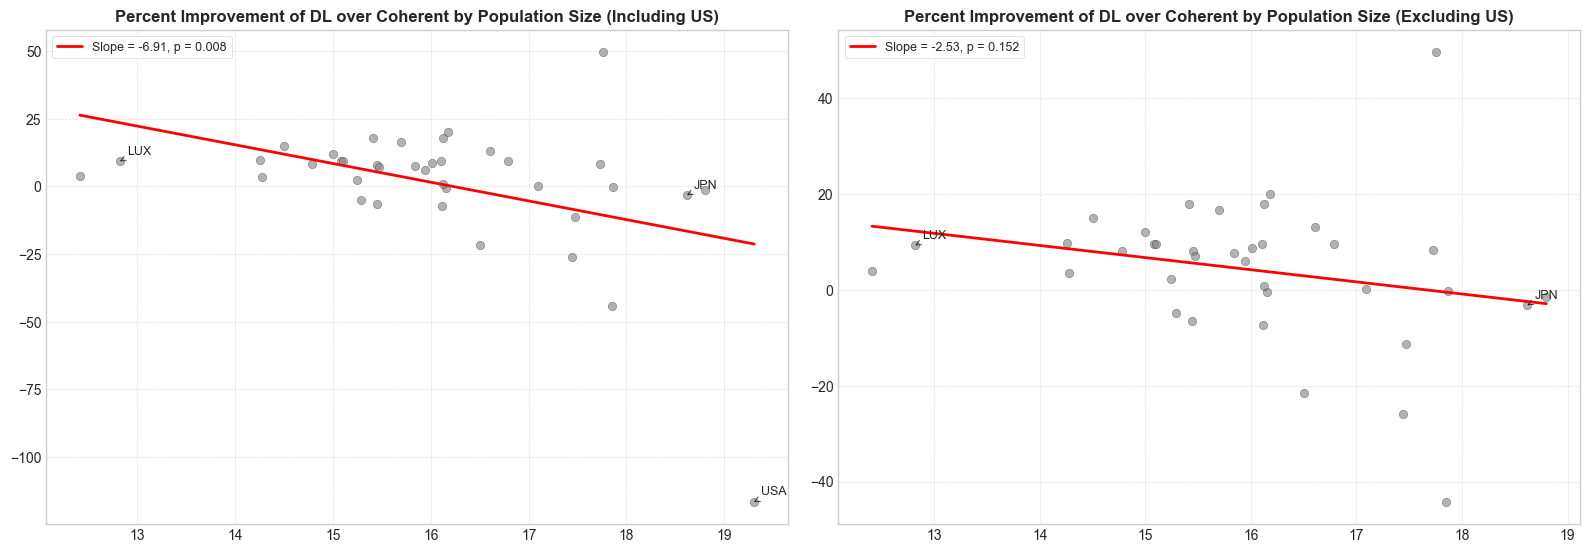

In [53]:

plt.style.use("seaborn-v0_8-whitegrid")

fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs_top = axs[0]
axs_bottom = axs[1]

titles = [
    "Percent Improvement of DL over Coherent by Population Size (Including US)",
    "Percent Improvement of DL over Coherent by Population Size (Excluding US)"
]

improvements = [
    ("coh", percent_improvement_all_countries_no_overall, False),
    ("coh", percent_improvement_all_countries_no_overall, True)
]

for i, (model, improvement_data, drop_usa) in enumerate(improvements):
    ax = axs[i]

    # Filter data
    if drop_usa:
        mask = pop_data_1987_all['Country Code'] != 'USA'
        data_filtered = pop_data_1987_all[mask]
        y_vals = np.array(improvement_data)[mask.to_numpy()]
    else:
        data_filtered = pop_data_1987_all
        y_vals = np.array(improvement_data)

    # Prepare x (log population)
    x_vals = data_filtered['1987'].astype(np.float64).to_numpy()
    log_x = np.log(x_vals)

    # Linear regression
    slope, intercept, r_value, p_value, std_err = linregress(log_x, y_vals)
    x_fit = np.linspace(min(x_vals), max(x_vals), 100)
    y_fit = slope * np.log(x_fit) + intercept

    # Plot data
    ax.scatter(log_x, y_vals, alpha=0.6, color='gray', edgecolor='black', linewidth=0.3)
    ax.plot(np.log(x_fit), y_fit, color='red', linewidth=2, label=f"Slope = {slope:.2f}, p = {p_value:.3f}")

    # Annotate specific countries
    for j in range(len(y_vals)):
        country = data_filtered.iloc[j]['Country Code']
        log_pop = np.log(float(data_filtered.iloc[j]['1987']))
        if country in ['LUX', 'JPN', 'USA']:
            ax.annotate(country,
                        (log_pop, y_vals[j]),
                        textcoords="offset points",
                        xytext=(5, 5),
                        ha='left',
                        fontsize=9,
                        arrowprops=dict(arrowstyle='->', lw=0.5, color='black'))

    # Labels and titles
    ax.set_title(titles[i], fontsize=12, fontweight='bold')
    ax.legend(fontsize=9, loc="best", frameon=True)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

    if col == 0:
        ax.set_ylabel("Percent Improvement of Deep Learning Model", fontsize=11)
    if row == 1:
        ax.set_xlabel("Log Population (millions)", fontsize=11)

plt.tight_layout()
plt.subplots_adjust(top=0.88)

plt.savefig("../results/pop-size-1x2.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [70]:
import csv
# loading in HMD data
data = []
ages = []
countries = []
genders = []
countries_to_remove = ["CHL", 'DEUTNP', 'FRACNP', 'GBRCENW', 'GBR_NP', 'HKG', 'HRV', 'KOR', 'NZL_MA', 'NZL_NM']


with open("../data/hmd.csv", "r") as file:
    reader = csv.reader(file,delimiter=",")
    for row_index, row in enumerate(reader):
        if row_index == 0:
            print(row)
        if row_index >= 1:
            country, gender, year, age, rate = row
            if country in countries_to_remove:
                continue
            year = int(year)
            try:
                age = int(age)
            except:
                age = -1
            if age not in ages and age != -1 and age <= 99:
                ages.append(age)
            if country not in countries:
                countries.append(country)
            country = countries.index(country)
            if gender not in genders:
                genders.append(gender)
            gender = genders.index(gender)
            try:
                rate = float(rate)
            except:
                rate = -1
            if rate > 1:
                rate = 1
            if age != -1 and rate != -1 and age <= 99:
                data.append([country, gender, year, age, rate])

country_data = np.array(data)


['PopName', 'Gender', 'Year', 'Age', 'MortalityRate']


In [72]:
geos_key

array([['AK', '0'],
       ['AL', '1'],
       ['AZ', '2'],
       ['AR', '3'],
       ['CA', '4'],
       ['CO', '5'],
       ['CT', '6'],
       ['DE', '7'],
       ['FL', '8'],
       ['GA', '9'],
       ['HI', '10'],
       ['ID', '11'],
       ['IL', '12'],
       ['IN', '13'],
       ['IA', '14'],
       ['KS', '15'],
       ['KY', '16'],
       ['LA', '17'],
       ['ME', '18'],
       ['MD', '19'],
       ['MA', '20'],
       ['MI', '21'],
       ['MN', '22'],
       ['MS', '23'],
       ['MO', '24'],
       ['MT', '25'],
       ['NE', '26'],
       ['NV', '27'],
       ['NH', '28'],
       ['NJ', '29'],
       ['NM', '30'],
       ['NY', '31'],
       ['NC', '32'],
       ['ND', '33'],
       ['OH', '34'],
       ['OK', '35'],
       ['OR', '36'],
       ['PA', '37'],
       ['RI', '38'],
       ['SC', '39'],
       ['SD', '40'],
       ['TN', '41'],
       ['TX', '42'],
       ['UT', '43'],
       ['VT', '44'],
       ['VA', '45'],
       ['WA', '46'],
       ['WV', '47'],
  

In [71]:
print(ages)
print(countries)
print(genders)
print(country_data[1:50, :])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
['AUS', 'AUT', 'BEL', 'BGR', 'BLR', 'CAN', 'CHE', 'CZE', 'DEUTE', 'DEUTW', 'DNK', 'ESP', 'EST', 'FIN', 'FRATNP', 'GBR_NIR', 'GBR_SCO', 'GBRTENW', 'GRC', 'HUN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'LTU', 'LUX', 'LVA', 'NLD', 'NOR', 'NZL_NP', 'POL', 'PRT', 'RUS', 'SVK', 'SVN', 'SWE', 'TWN', 'UKR', 'USA']
['f', 'm']
[[0.0000e+00 1.0000e+00 1.9210e+03 0.0000e+00 7.6533e-02]
 [0.0000e+00 0.0000e+00 1.9210e+03 1.0000e+00 1.2064e-02]
 [0.0000e+00 1.0000e+00 1.9210e+03 1.0000e+00 1.4339e-02]
 [0.0000e+00 0.0000e+00 1.9210e+03 2.0000e+00 5.7790e-03]
 [0.0000e+00 1.0000e+00 1.9210e+03 2.0000e+00 6.0470e-03]
 [0.0